In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DESCRIPTION**

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.

**Objective:** 
Use a deep convolutional neural network to perform facial recognition using Keras.


**Dataset Details:**

ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.


Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

**Pre-requistes**

-Scikit Learn

-Keras

**Steps to be followed:**
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:
     
     i. Convolutional Layer
     
     ii. Pooling Layer
     
     iii. Fully Connected Layer


6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

**Step 1:** Import required libraries

In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten

**Step 2:** Load the dataset after loading the dataset, you have to normalize every image.

In [2]:
import numpy as np
data=np.load('/content/drive/MyDrive/AI/adv_dl_computer_vision/assesment_tests/datasets/ORL_faces.npz')

In [3]:
x_train=data['trainX']

**Step 3:** Split the dataset

In [4]:
x_train=np.array(x_train,dtype='float32')/255

In [5]:
x_test=data['testX']
x_test=np.array(x_test,dtype='float32')/255

In [6]:
print(x_train)

[[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]


In [7]:
y_train=data['trainY']
y_test=data['testY']

In [8]:
print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of x_test is: {}'.format(x_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))


The shape of x_train is: (240, 10304)
The shape of x_test is: (160, 10304)
The shape of y_train is: (240,)
The shape of y_test is: (160,)


In [9]:
print(y_train)

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19]


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.05,random_state=42)

**Step 4:**Transform the images to equal sizes to feed in CNN

In [11]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows,im_cols,1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


**Step 5**:Build a CNN model that has 3 main layers:

i. Convolutional Layer

ii. Pooling Layer

iii. Fully Connected Layer

In [36]:
#filters= the depth of output image or kernels
from keras.models import Sequential

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPool2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

**Step 6:** Train the model

In [37]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 32s - loss: 3.0126 - accuracy: 0.0175 - val_loss: 3.0142 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 0s - loss: 2.9819 - accuracy: 0.0658 - val_loss: 3.0136 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 0s - loss: 2.9864 - accuracy: 0.0439 - val_loss: 3.0179 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 - 0s - loss: 2.9660 - accuracy: 0.1096 - val_loss: 3.0190 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 - 0s - loss: 2.9946 - accuracy: 0.0570 - val_loss: 3.0184 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 - 0s - loss: 3.0243 - accuracy: 0.0439 - val_loss: 3.0234 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 0s - loss: 2.9962 - accuracy: 0.0482 - val_loss: 3.0242 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 0s - loss: 2.9753 - accuracy: 0.0921 - val_loss: 3.0183 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 0s - loss: 3.0028 - accuracy: 0.0746 - val_loss: 3.0108 - val_accuracy: 0.0000e+00
Epoch 10/250
1/1 - 0s - loss: 2.9768 - accuracy: 0.1009 - val_loss: 3.0037 - val_accuracy:

**Step 7:** Plot the result

In [38]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


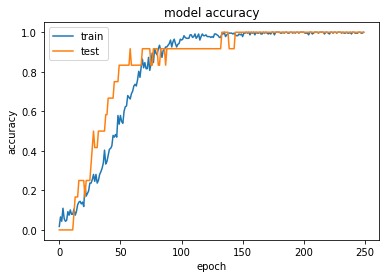

In [39]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

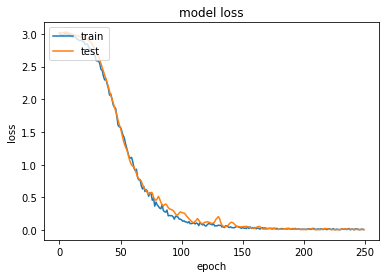

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()